<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **10% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Thursday, April 4**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Estimated time**      |  **10 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-1.ipynb` as part of your submission by pushing it to your forked GitLab repository. You need to add your student details below. Any changes to file name will mean your file can't be marked by the auto-grader, resulting in a `zero mark`.


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 

<span style="color:blue">
    
### Student ID :  u6611178

### Student Name: Yanming Feng (Danny)
</span>

## Introduction

**Bicycle Sharing Systems** are a healthy, cheap and green way to navigate between one place to another. Now with the new generation of electronic registration and sharing, the whole process of transportation, right from the membership to the rental and returning back has become convenient and automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Bike sharing companies like **Mobike**, **OBike** and **AirBike** have grown pretty popular throughout Australia in the past few years, due to them being environment-friendly, pro-health and not to mention, a cheap and convenient mode of transport.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the **duration of travel**, **departure** and **arrival position** is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Data

You have been given a file named **bike-share.csv** which contains a dataset of two years of historical log corresponding to years 2011 and 2012 from **Capital Bikeshare** System, Washington D.C., USA. The dataset has 15 attributes such as **date**, **weekday/weekend/public holiday**, **weather situation**, **temperature** and **the count of number of bikes rented on that day**. Based on this data, our primary aim in this assignment is to visualise and analyse any insights we can get from this data and then predict a trend in the bike rentals.


_Refer to **bike-share-README.txt** for more information on the various attributes present in this data._

In [1]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## LOAD THE DATA

Load the data into a Pandas DataFrame and make it ready for use for analysis and visualization.<span style= 'float: right;'><b>[5 marks]</b></span>

**HINTS** -
* You might need to split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* You might need to rename some columns so that they make sense to you.
* You might need to cast some of the columns into their appropriate datatypes and/or remove any unnecessary characters that may hinder computation.

In [3]:
# YOUR CODE HERE
col_names = ['Index', 'Date', 'Season', 'Year', 'Month', 'Holiday', 'Weekday', 'Working Day', 'Weather', 'Temperature',
             'Feeling Temperature', 'Humidity', 'Windspeed', 'Casual User', 'Registered User', 'Rented Bikes']
df_bikes = pd.read_csv('bike-share.csv', names=col_names, index_col=0, header=0)
df_bikes = df_bikes.drop('Holiday', 1)
df_bikes.head()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

,Date,Season,Year,Month,Weekday,Working Day,Weather,Temperature,Feeling Temperature,Humidity,Windspeed,Casual User,Registered User,Rented Bikes
Index,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<span style="color:blue">
    
### YOUR ANSWER HERE
I changed the column title name so that readers can easily understand. I also make the first column 'instant' as pandas' index. I don't think there is a need to split any column. Maybe I can combine Feeling Temperature with Temerature. But there will be information lost. So I won't do that.

I think Holiday and Working Day can be combined and simplified. Because the holiday already means that it's not a working day. What's more, there are only 21 samples that the holiday is 1 which means it's a small sample, and we don't have the needs to study this attribute. So I dropped it for simplicity. For the latter question, using the working day is enough.
</span>

## EXPLORATORY DATA ANALYSIS

In this section you are expected to do an exploratory data analysis on the dataset that you've just loaded and readied. <span style= 'float: right;'><b>[15 marks]</b></span>

**HINTS** -

* Explore your data both statistically and visually, in order to find some statistical insights about your data.
* Announce some descriptive stats on your data and explain what they mean in the context of this dataset.

Data from 2011: 365
Data from 2012: 366
Average daily registered users count: 3656    Percentage: 81.17
Average daily unregistered users count: 848   Percentage: 18.83
Average daily temperature: 20.3
Average daily feeling temperature: 23.7
Average daily wind speed: 12.8
Average daily humidity: 62.8
Average daily weathersit: 1.3953488372093024   Number 1 =  Clear, Few clouds, Partly cloudy, Partly cloudy
daily average users' amount is: 3656.172366621067
Total users greater than mean: 364
Proportion: 0.49794801641586867
The date that has most registered users: ['2012-09-26']
The date that has most casual users: ['2012-05-19']
The date that has most users: ['2012-09-15']


,Weather,Temperature,Feeling Temperature,Humidity,Windspeed,Casual User,Registered User,Rented Bikes
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


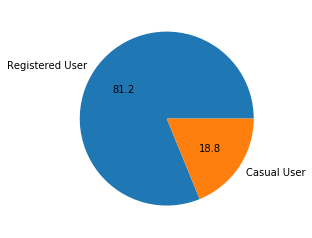

In [4]:
# YOUR CODE HERE
print("Data from 2011:", df_bikes[df_bikes.Year == 0].count()[1])
print("Data from 2012:", df_bikes[df_bikes.Year == 1].count()[1])
regist = round(df_bikes['Registered User'].mean())
unregist = round(df_bikes['Casual User'].mean())
allusers = regist + unregist
print("Average daily registered users count:", regist, "   Percentage:", round(regist / allusers * 100, 2))
print("Average daily unregistered users count:", unregist, "  Percentage:", round(unregist / allusers * 100, 2))
print("Average daily temperature:", round((df_bikes['Temperature'].mean()) * 41, 1))
print("Average daily feeling temperature:", round((df_bikes['Feeling Temperature'].mean()) * 50, 1))
print("Average daily wind speed:", round((df_bikes['Windspeed'].mean()) * 67, 1))
print("Average daily humidity:", round((df_bikes['Humidity'].mean()) * 100, 1))
print("Average daily weathersit:", df_bikes['Weather'].mean(),
      "  Number 1 =  Clear, Few clouds, Partly cloudy, Partly cloudy")


# Find proportion more then mean
counter = 0
user_mean = df_bikes['Registered User'].mean()
print("daily average users' amount is:", user_mean)
for x in df_bikes['Registered User']:
    if x < user_mean:
        counter += 1
print("Total users greater than mean:", counter)
print("Proportion:", counter / len(df_bikes))

# Find which date that has most users
most_user = df_bikes['Registered User'].max()
most_user_row = df_bikes.loc[df_bikes['Registered User'] == most_user]
print("The date that has most registered users:", most_user_row.Date.values)

# Find which date that has most causal users
most_user = df_bikes['Casual User'].max()
most_user_row = df_bikes.loc[df_bikes['Casual User'] == most_user]
print("The date that has most casual users:", most_user_row.Date.values)

# Find which date that has most causal users
most_user = df_bikes['Rented Bikes'].max()
most_user_row = df_bikes.loc[df_bikes['Rented Bikes'] == most_user]
print("The date that has most users:", most_user_row.Date.values)

plt.pie([regist, unregist], labels=['Registered User', 'Casual User'], autopct='%.1f')
df_bikes.describe().drop(columns=['Season', 'Year', 'Month', 'Weekday', 'Working Day'])
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
The data amount is 731. There were 365 data recorded in 2011 and 366 in 2012. 81.17% of the daily users were registered while 18.83% were not. Average feeling temperature is 23.7, which is the most comfortable temperature. Average daily weathersit is 1.4, which shows that most of the client rode a bike in good weather.

The daily average users' amount is 3656, there is half of the day that the user amount is higher than mean. So the distribution is quite equal.

From the table, we know that the max registered users are 6946. I found out that this happened on 2012-09-26. Max causal users are 3410, the date of that is different, it is 2012-05-19. The date that has most users is 2012-09-15.

I tried to find if there was any big event happened in U.S or Washington on those days, but there is no interesting finding.
</span>

## DATA ANALYSIS

In this section, use your data slicing and dicing skills to come up with specialised analysis on a subset of the data. Let's see if you can answer these specific analysis questions. You are expected to plot appropriate graphs / plots and explain your analysis (using Markdown text) wherever necessary. 

### 1. Is there any relationship between weather situation / outside temperature and the number of bikes rented on a given day? 
<span style= 'float: right;'><b>[10 marks]</b></span>

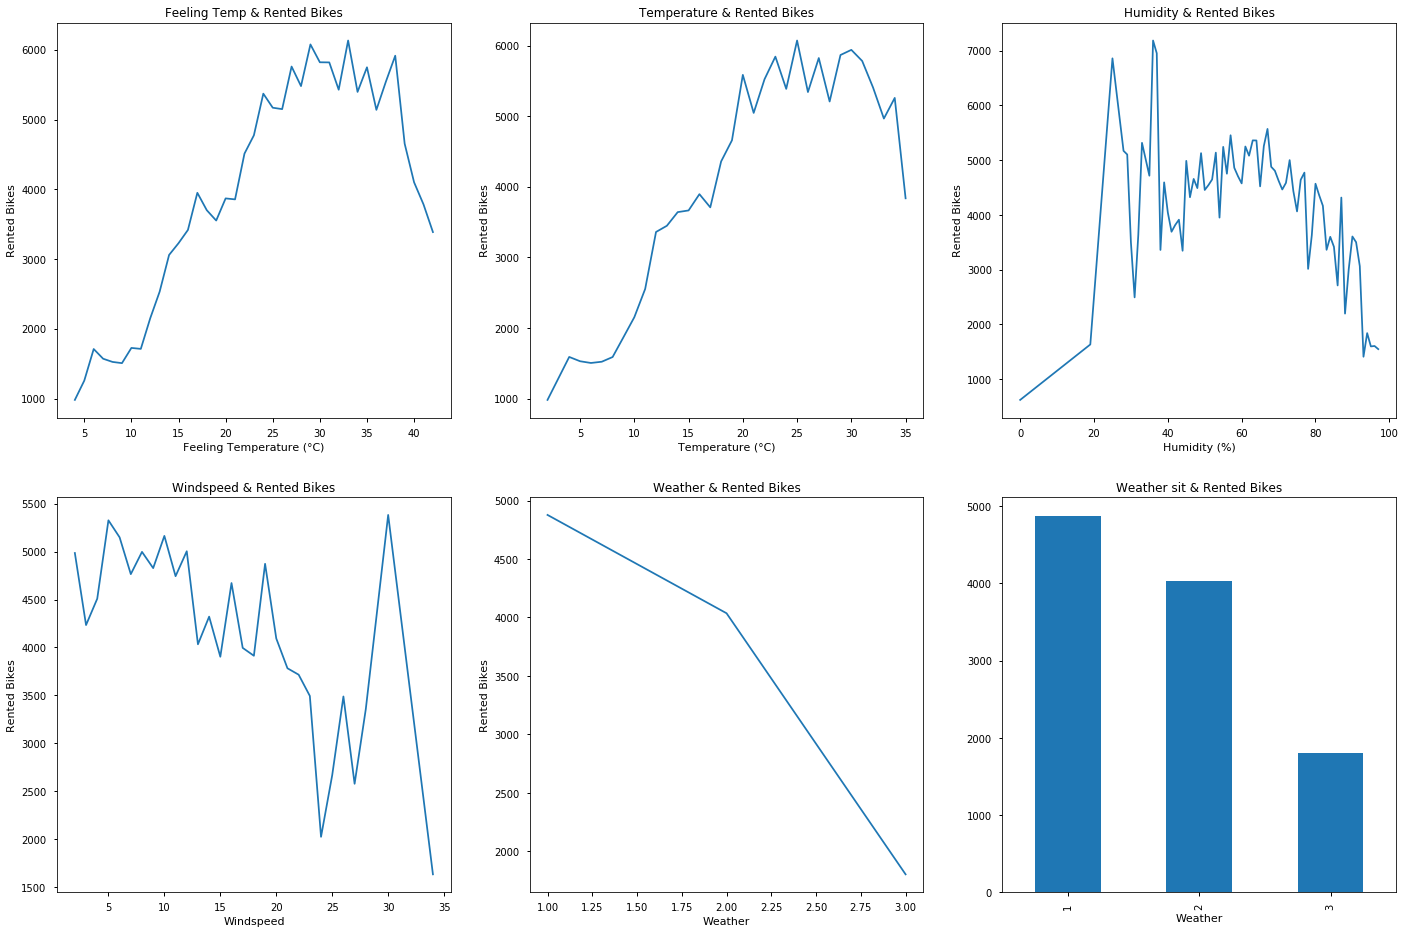

In [5]:
# YOUR CODE HERE
fig = plt.figure(figsize=(24, 16))
df_bikes1 = df_bikes.copy()
df_bikes1['Feeling Temperature'] = round(df_bikes1['Feeling Temperature'] * 50)
df_bikes1['Temperature'] = round(df_bikes1['Temperature'] * 41)
df_bikes1['Humidity'] = round(df_bikes1['Humidity'] * 100)
df_bikes1['Windspeed'] = round(df_bikes1['Windspeed'] * 67)

ax1 = fig.add_subplot(231)
ax1.plot(df_bikes1.groupby(['Feeling Temperature'])['Rented Bikes'].mean())
ax1.set_xlabel("Feeling Temperature (°C)")
ax1.set_ylabel("Rented Bikes")
ax1.set_title("Feeling Temp & Rented Bikes")

ax2 = fig.add_subplot(232)
ax2.plot(df_bikes1.groupby(['Temperature'])['Rented Bikes'].mean())
ax2.set_xlabel("Temperature (°C)")
ax2.set_ylabel("Rented Bikes")
ax2.set_title("Temperature & Rented Bikes")

ax3 = fig.add_subplot(233)
ax3.plot(df_bikes1.groupby(['Humidity'])['Rented Bikes'].mean())
ax3.set_xlabel("Humidity (%)")
ax3.set_ylabel("Rented Bikes")
ax3.set_title("Humidity & Rented Bikes")

ax4 = fig.add_subplot(234)
ax4.plot(df_bikes1.groupby(['Windspeed'])['Rented Bikes'].mean())
ax4.set_xlabel("Windspeed")
ax4.set_ylabel("Rented Bikes")
ax4.set_title("Windspeed & Rented Bikes")

ax5 = fig.add_subplot(235)
ax5.plot(df_bikes1.groupby(['Weather'])['Rented Bikes'].mean())
ax5.set_xlabel("Weather")
ax5.set_ylabel("Rented Bikes")
ax5.set_title("Weather & Rented Bikes")

ax6 = fig.add_subplot(236)
df_gp = df_bikes1.groupby(['Weather'])['Rented Bikes'].mean()
df_gp.plot(kind = 'bar', title = 'Weather sit & Rented Bikes')
plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
I take the round() of the numbers and then use groupby(), so that the data won't be a mass. Please note that I revert normalization based on readme file provided so that it's human readable. However, the readme file seems wrong in its method of normalization. I tried other ways to reverse engineer it but I decided to follow the provided readme in the end.

From the graphs, we can easily see that there are strong relationships between weather conditions and rented bikes. The user's amount drops sharply when the temperature is either too low or too high. The temperature with the highest user's amount is around 25°C. User's amount always drops significantly when the weather is bad. For example, too dry, too wet or too windy. The last line plot also proves that the worse the weather (higher weather number means worse weather), the fewer bikes are rented.

</span>

### 2. Is there any relationship between the day of the week / holiday and the number of bikes rented on a given day?
<span style= 'float: right;'><b>[10 marks]</b></span>

         Rented Bikes
Weekday              
0                 105
1                 105
2                 104
3                 104
4                 104
5                 104
6                 105
You can see, data count is not equal again, some are 105, some are 104, need to randomly drop 1 data from 105
         Rented Bikes
Weekday              
0                 104
1                 104
2                 104
3                 104
4                 104
5                 104
6                 104
         Rented Bikes
Weekday              
5              487790
4              485395
3              473048
6              472688
2              469109
1              448398
0              440242


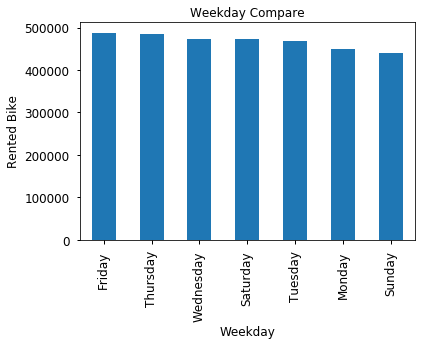

Most popluar Weekday: 5 which is Friday
Least popluar Weekday: 0 which is Sunday


In [6]:
# YOUR CODE HERE
df_bikes_dropped = df_bikes.copy()
df_weekday = df_bikes_dropped.groupby(['Weekday']).agg({'Rented Bikes': 'count'})
print(df_weekday)
print("You can see, data count is not equal again, some are 105, some are 104, need to randomly drop 1 data from 105")
# df_bikes_dropped is the dataframe I made so that the data amount between each weekday are equal
df_bikes_dropped = df_bikes_dropped.drop(df_bikes_dropped.query('Weekday == 0').sample(1).index)
df_bikes_dropped = df_bikes_dropped.drop(df_bikes_dropped.query('Weekday == 1').sample(1).index)
df_bikes_dropped = df_bikes_dropped.drop(df_bikes_dropped.query('Weekday == 6').sample(1).index)
df_weekday = df_bikes_dropped.groupby(['Weekday']).agg({'Rented Bikes': 'count'})
print(df_weekday)

df_weekday = df_bikes_dropped.groupby(['Weekday']).agg({'Rented Bikes': 'sum'})
df_weekday = df_weekday.sort_values(['Rented Bikes'], ascending=False)
print(df_weekday)

ax = df_weekday['Rented Bikes'].plot(kind='bar', title="Weekday Compare", fontsize=12)
ax.set_xlabel("Weekday", fontsize=12)
ax.set_ylabel("Rented Bike", fontsize=12)

# Set x ticks dynamically
wekd_orderedlist = []
for i in range(0, len(df_weekday)):
    wekd_orderedlist.append(calendar.day_name[df_weekday.index[i] - 1])
ax.set_xticklabels(wekd_orderedlist)

plt.show()

weekday_mode = df_weekday.index[0]
weekday_min = df_weekday.index[len(df_weekday) - 1]
# In calendar.day_name list, the day starts from Monday, so index should minus 1
# Print result dynamically
print("Most popluar Weekday:", weekday_mode, "which is", calendar.day_name[weekday_mode - 1])
print("Least popluar Weekday:", weekday_min, "which is", calendar.day_name[weekday_min - 1])
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
There is some difference in users amount between weekdays. People seem to use bike share services for commuting because weekends are not the most popular days. Friday and Thursday are. (Maybe people were bored to drive or walk by the end of the week so they changed to use the bike. Perhaps they rode it to clubs for a party on Thursday night. Need time and location data to draw such conclusion.)

</span>

### 3. How do the number of registered and casual users vary with respect to each other during holidays and work days? 
<span style= 'float: right;'><b>[15 marks]</b></span>

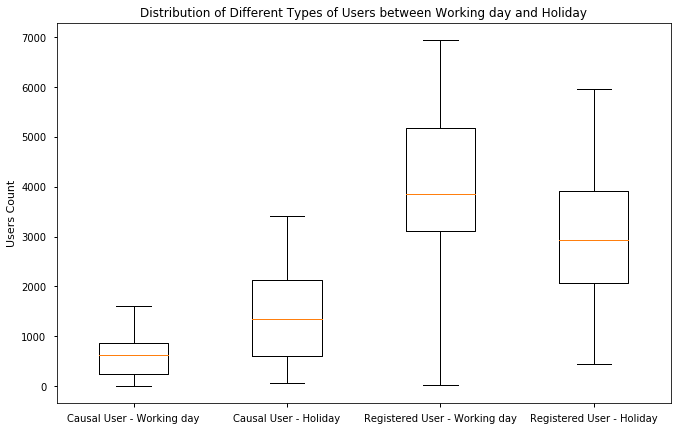

In [7]:
# YOUR CODE HERE
fig = plt.figure(figsize=(11, 7))
df_causl_workday = df_bikes[df_bikes['Working Day'] == 1]['Casual User']
df_causl_holiday = df_bikes[df_bikes['Working Day'] == 0]['Casual User']

df_regist_workday = df_bikes[df_bikes['Working Day'] == 1]['Registered User']
df_regist_holiday = df_bikes[df_bikes['Working Day'] == 0]['Registered User']

ax = fig.add_subplot(111)
ax.boxplot([df_causl_workday, df_causl_holiday, df_regist_workday, df_regist_holiday],
           labels=['Causal User - Working day', 'Causal User - Holiday', 'Registered User - Working day',
                   'Registered User - Holiday'])
ax.set_title('Distribution of Different Types of Users between Working day and Holiday')
ax.set_ylabel('Users Count')
plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
The plot above shows that there were more casual users on holiday compared to the working day.


For registered users, they were more likely to use the service during the working day.


The reasons for the results are that people registered because they want to use this service in the future. A registered user is more likely to be a frequent user that use the service in their daily life. Thus, more registered users in the working day. In holiday, more potential customers have free time to try out the shared bike. They might not need to use it during the working day because they already have other transportation.
</span>

### 4. What relationship can you find among the attributes relating to weather in this dataset?
<span style= 'float: right;'><b>[6 marks]</b></span>

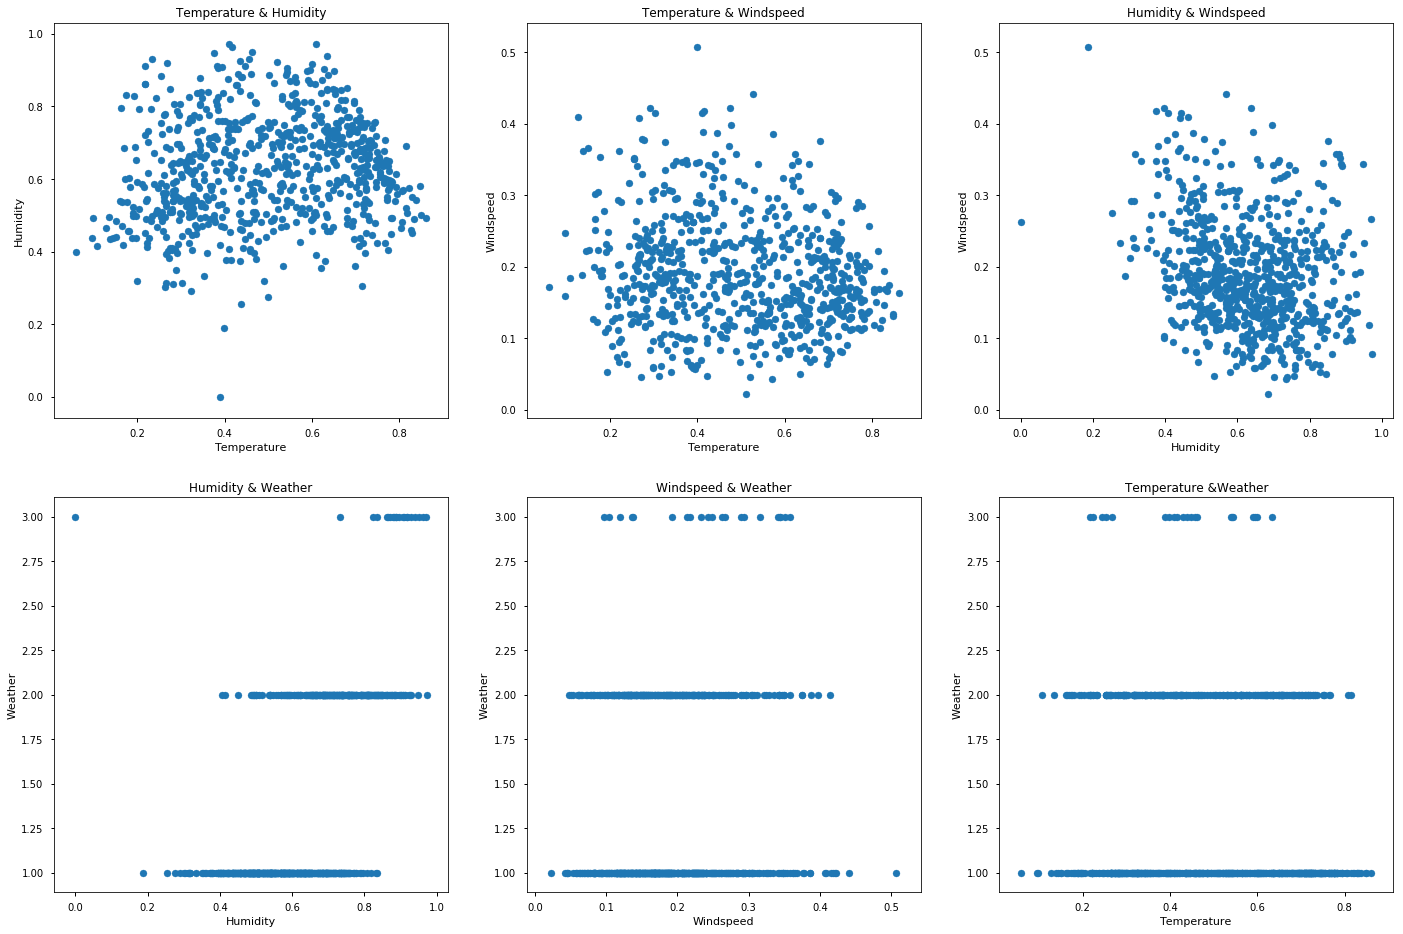

In [8]:
# YOUR CODE HERE
fig = plt.figure(figsize=(24, 16))
ax1 = fig.add_subplot(231)
ax1.scatter(df_bikes['Temperature'], df_bikes['Humidity'])
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Humidity")
ax1.set_title("Temperature & Humidity")

ax2 = fig.add_subplot(232)
ax2.scatter(df_bikes['Temperature'], df_bikes['Windspeed'])
ax2.set_xlabel("Temperature")
ax2.set_ylabel("Windspeed")
ax2.set_title("Temperature & Windspeed")

ax3 = fig.add_subplot(233)
ax3.scatter(df_bikes['Humidity'], df_bikes['Windspeed'])
ax3.set_xlabel("Humidity")
ax3.set_ylabel("Windspeed")
ax3.set_title("Humidity & Windspeed")

ax4 = fig.add_subplot(234)
ax4.scatter(df_bikes['Humidity'], df_bikes['Weather'])
ax4.set_xlabel("Humidity")
ax4.set_ylabel("Weather")
ax4.set_title("Humidity & Weather")

ax5 = fig.add_subplot(235)
ax5.scatter(df_bikes['Windspeed'], df_bikes['Weather'])
ax5.set_xlabel("Windspeed")
ax5.set_ylabel("Weather")
ax5.set_title("Windspeed & Weather")

ax6 = fig.add_subplot(236)
ax6.scatter(df_bikes['Temperature'], df_bikes['Weather'])
ax6.set_xlabel("Temperature")
ax6.set_ylabel("Weather")
ax6.set_title("Temperature &Weather")

plt.show()
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE

Only the fourth graph, which is "Humidity & Weather" indicates the obvious relationship between each other.

"Weather" is a categorical data, so the scatter plots may not be very fancy but it still makes senses.

The higher the humidity was, the worse the weather was. The central tendency of the weather situation 3 shows if the weather is bad, it is very likely that the humidity is very high.

From readme file:
"weather" number means
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
</span>

### 5. From this dataset, find out something that this data doesn’t show you directly, but you find interesting about this dataset.
<span style= 'float: right;'><b>[14 marks]</b></span>

        Rented Bikes
Season              
1                181
2                184
3                188
4                178
You can see, data count is not equal


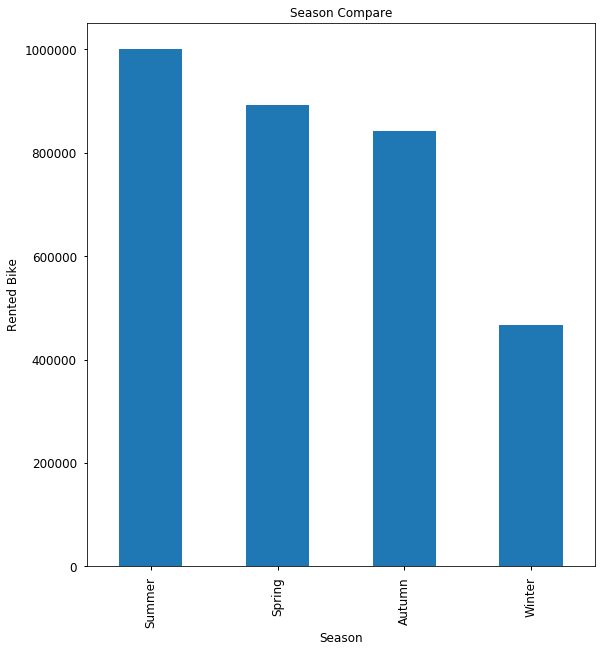

        Rented Bikes
Season              
3            1001441
2             892261
4             841613
1             467484
Most popluar Season: 3 which is Summer
Least popluar Season: 1 which is Winter


In [9]:
# YOUR CODE HERE
fig = plt.figure(figsize=(20, 10))


def convert_seasons(x):
    if x == 1:
        return "Winter"
    if x == 2:
        return "Spring"
    if x == 3:
        return "Summer"
    if x == 4:
        return "Autumn"


df_bikes_dropped = df_bikes.copy()  # Do the modification in a copied dataframe
# Check how many data are there in each season. Need to make it equal. Otherwise it will bring errors
df_season = df_bikes_dropped.groupby(['Season']).agg({'Rented Bikes': 'count'})
print(df_season)
print("You can see, data count is not equal")

# Make the data count equal for each season. Otherwise, it is unfair and it will bring errors
df_bikes_dropped = df_bikes_dropped.drop(df_bikes_dropped.query('Season == 1').sample(3).index)
df_bikes_dropped = df_bikes_dropped.drop(df_bikes_dropped.query('Season == 2').sample(6).index)
df_bikes_dropped = df_bikes_dropped.drop(df_bikes_dropped.query('Season == 3').sample(10).index)

df_season = df_bikes_dropped.groupby(['Season']).agg({'Rented Bikes': 'sum'})
df_season = df_season.sort_values(['Rented Bikes'], ascending=False)
ax1 = fig.add_subplot(121)
ax1 = df_season['Rented Bikes'].plot(kind='bar', title="Season Compare", fontsize=12)
ax1.set_xlabel("Season", fontsize=12)
ax1.set_ylabel("Rented Bike", fontsize=12)
ses_orderedlist = []

# Set x ticks dynamically
for i in range(0, len(df_season)):
    ses_orderedlist.append(convert_seasons(df_season.index[i]))
ax1.set_xticklabels(ses_orderedlist)
plt.show()

print(df_season)
season_mode = df_season.index[0]
season_min = df_season.index[len(df_season) - 1]
# Print result dynamically
print("Most popluar Season:", season_mode, "which is", convert_seasons(season_mode))
print("Least popluar Season:", season_min, "which is", convert_seasons(season_min))
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
The data was not very clean because the data amount between four seasons is different. I did data cleaning before analysis. Please note that I converted season number to corresponding English word dynamically in my code based on the month. The readme file is wrong in this part.

Users are more likely to use a shared bike in summer. The difference between summer and winter, which is the least popular season, is huge. More than half less in winter. The reason can be that it was cold and the weather condition influenced the client's willingness to ride a bike.

</span>

## LINEAR REGRESSION

Now comes the fun part! In this section you have to implement a **Linear Regression Model**. Companies like **Mobike** and **AirBike** would like to make some predictions on their sales for the next few years. A linear Regression Model will help them predict the growth of their company in the coming years.

Your job is to implement a Linear Regression Model that predicts the number of bikes rented daily, based on the environmental and seasonal variables. There are multiple ways of doing this in Python. You are free to use any Python modules you like for this implementation. 
<span style= 'float: right;'><b>[25 marks]</b></span>

Accuracy (R^2):
0.5065408091703802


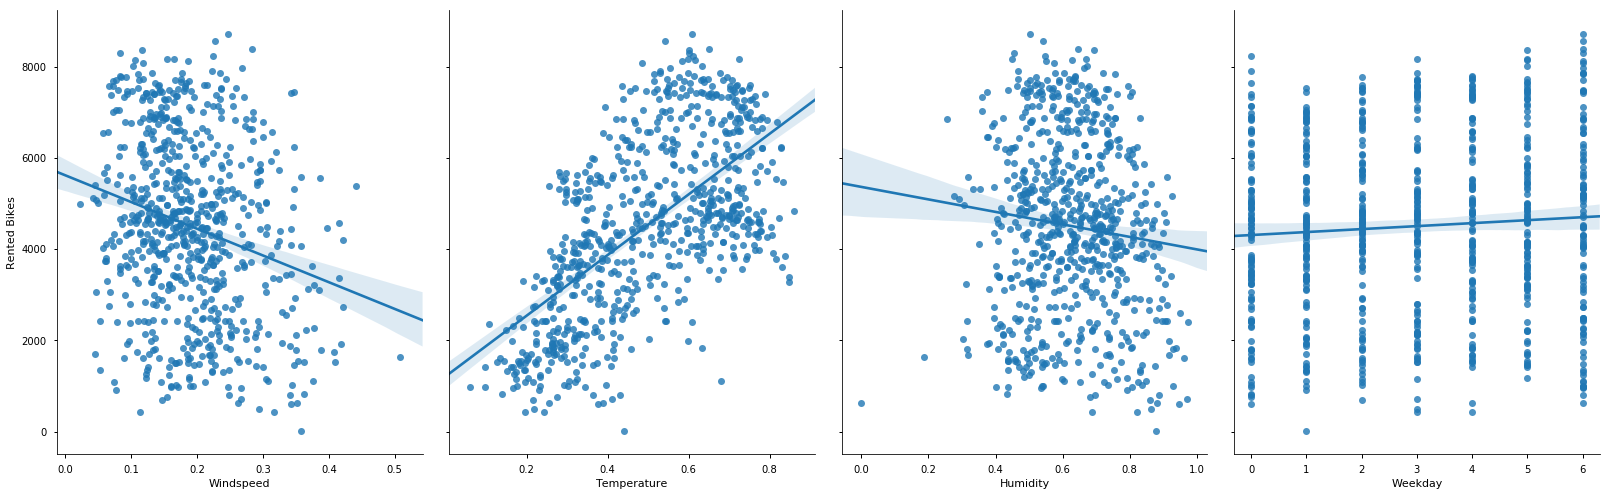

Coefficients: [-4576.91831915  6360.55383688 -3366.21313109    77.72940721]
Intercept: 4156.481249212604


In [10]:
# YOUR CODE HERE
# First Round
lm = LinearRegression()
selected_col = ['Windspeed', 'Temperature', 'Humidity', 'Weekday']
X = df_bikes[selected_col]
y = df_bikes['Rented Bikes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
lm.fit(X_train, y_train)
print("Accuracy (R^2):")
print(lm.score(X_test, y_test))
sns.pairplot(df_bikes, x_vars=selected_col, y_vars='Rented Bikes', size=7, aspect=.8, kind='reg')
plt.show()
df_bikes
print("Coefficients:", lm.coef_)
print("Intercept:", lm.intercept_)
# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE
It is a good habit to split the train and test data. In my first round, I tried only three independent variables, which are all environment related. I used "seaborn" to draw the linear regression for each variable independently to check the relationship and decided if I need to keep it in round 2. 

Weekday is not a continuous variable. It's not a good idea to put it to the model directly. Because weekday 3 doesn't means three times more than weekday 1. So in round 2, I split "Weekday" to Mon, Tue, Wed and set 0 and 1 to represent Yes/Not. Besides, "Weather Condition" represents "Humidity" and "Windspeed" in a way. So I use that as a variable instead.

</span>

Accuracy (R^2):
0.5305804989884313


Intercept: 2511.2784203193746


Coefficients:
Monday                 -146.502378
Tuesday                 -41.823848
Wednesday                55.392730
Thursday                 73.992369
Friday                  184.725044
Saturday                262.696009
Sunday                 -388.479927
Weather                -534.318548
Season                  482.292237
Feeling Temperature    6142.807059
Humidity              -2147.256757
dtype: float64


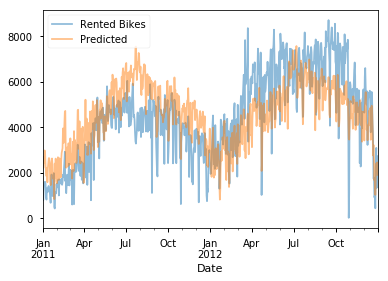

In [11]:
# Second Round
df_reg = pd.read_csv('bike-share.csv', names=col_names, index_col='Date', header=0, parse_dates=True)
for i in range(0, 7):
    df_reg[calendar.day_name[i]] = (df_reg.index.dayofweek == i).astype(int)
df_reg = df_reg.drop(['Index', 'Year', 'Month', 'Casual User', 'Registered User', 'Holiday', 'Weekday'], 1)
selected_col = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Weather',
                'Season', 'Feeling Temperature', 'Humidity']
X = df_reg[selected_col]
y = df_reg['Rented Bikes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)
df_reg['Predicted'] = lm.predict(X)
df_reg[['Rented Bikes', 'Predicted']].plot(alpha=0.5);
print("Accuracy (R^2):")
print(lm.score(X_test, y_test))
print("\n")
print("Intercept:", lm.intercept_)
print("\n")
coef = pd.Series(lm.coef_, index=X.columns)
print("Coefficients:")
print(coef)

<span style="color:blue">
    
### YOUR ANSWER HERE
The final model is: Rented Bikes = -203.5 * Mon + (-148.3) * Tue + (-46.3) * Wed + ..... + (-2128.7) * Humidity + 2281 

I set date as an index this time so that we can predict as time goes. Dummy variables can be put into the model. So I split weekday into seven. I also found out that "Feeling Temp" is better than "Temp" because it's closer to what people really feel and it improves the R^2. After changing the independent variables, the accuracy improves from 0.50 to 0.53. Which means 53% of the data can be explained and predicted by the model. 

From the coefficients, we can see that "Season" has the strongest positive influence on the Rented bikes while "Humidity" has the most substantial negative influence. High humidity day is typically a rainy or foggy day. Thus fewer people would use the bike.

I think the "Multicollinearity" in the independent variable makes the model not very good. E.g., "Season", "Temperature" and "Humidity" are not completely independent to each other. So that we still have the space to improve.

</span>